# CNN Fashion Product Image Classification


## Part 1: Image Classification using CNN

In [ ]:
#Import dataset
from google.colab import files
uploads = files.upload()


In [ ]:
! unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: ./myntradataset/images/58131.jpg  
  inflating: ./myntradataset/images/58132.jpg  
  inflating: ./myntradataset/images/58133.jpg  
  inflating: ./myntradataset/images/58135.jpg  
  inflating: ./myntradataset/images/58136.jpg  
  inflating: ./myntradataset/images/58137.jpg  
  inflating: ./myntradataset/images/58138.jpg  
  inflating: ./myntradataset/images/58139.jpg  
  inflating: ./myntradataset/images/5814.jpg  
  inflating: ./myntradataset/images/58140.jpg  
  inflating: ./myntradataset/images/58141.jpg  
  inflating: ./myntradataset/images/58143.jpg  
  inflating: ./myntradataset/images/58144.jpg  
  inflating: ./myntradataset/images/58145.jpg  
  inflating: ./myntradataset/images/58146.jpg  
  inflating: ./myntradataset/images/58147.jpg  
  inflating: ./myntradataset/images/58148.jpg  
  inflating: ./myntradataset/images/58149.jpg  
  inflating: ./myntradataset/images/5815.jpg  
  inflating: ./myntradataset/images/581

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import PIL
import tensorflow as tf
import matplotlib.image as image
import seaborn as sns
import pickle

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import keras_tuner

import warnings
warnings.filterwarnings('ignore')

import random

my_seed = 1234
np.random.seed(my_seed)

In [ ]:
#reading the styles.csv file
df = pd.read_csv('styles.csv', header = 'infer',error_bad_lines = False)
df = df[['id','subCategory']] # filtering to 2 columns of our interest

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [ ]:
df.head()

In [ ]:
df['subCategory'].value_counts()

Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

In [ ]:
# Set categories
categories = ['Topwear', 'Bottomwear', 'Innerwear', 'Bags', 'Watches', 'Jewellery', 'Eyewear', 'Wallets', 'Shoes', 'Sandal', 'Makeup',
'Fragrance', 'Others']
print(len(categories))

13


In [ ]:
# Change all items that do not fit categories to 'Other'
df['subCategory'] = df['subCategory'].apply(lambda x: x if x in categories else 'Other')

df['subCategory'].value_counts()

Topwear       15402
Shoes          7343
Other          6214
Bags           3055
Bottomwear     2694
Watches        2542
Innerwear      1808
Jewellery      1079
Eyewear        1073
Fragrance      1011
Sandal          963
Wallets         933
Makeup          307
Name: subCategory, dtype: int64

<Axes: >

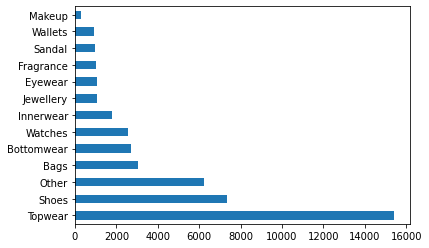

In [ ]:
# Represent division of categories visually
df['subCategory'].value_counts().plot.barh()

In [ ]:
# Connect images to id names
base_path = './images/'
df['filename'] = df['id'].apply(lambda x: str(base_path + str(x) + '.jpg'))

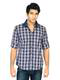

In [ ]:
image.load_img(df['filename'][0])

### Train + Test Dataset Processing



In [ ]:
train_df = pd.read_csv('train.csv', header = 'infer',error_bad_lines = False)
test_df = pd.read_csv('test.csv', header = 'infer',error_bad_lines = False)

b'Skipping line 4447: expected 1 fields, saw 2\nSkipping line 6988: expected 1 fields, saw 2\nSkipping line 10867: expected 1 fields, saw 2\nSkipping line 11155: expected 1 fields, saw 2\nSkipping line 13654: expected 1 fields, saw 2\nSkipping line 14698: expected 1 fields, saw 2\nSkipping line 14735: expected 1 fields, saw 2\nSkipping line 15866: expected 1 fields, saw 2\nSkipping line 19571: expected 1 fields, saw 3\nSkipping line 22482: expected 1 fields, saw 2\nSkipping line 25638: expected 1 fields, saw 2\nSkipping line 26897: expected 1 fields, saw 2\nSkipping line 28805: expected 1 fields, saw 2\nSkipping line 28951: expected 1 fields, saw 3\nSkipping line 32327: expected 1 fields, saw 2\nSkipping line 35574: expected 1 fields, saw 2\nSkipping line 37662: expected 1 fields, saw 2\nSkipping line 38151: expected 1 fields, saw 2\n'
b'Skipping line 1261: expected 1 fields, saw 2\nSkipping line 1529: expected 1 fields, saw 2\n'


In [ ]:
train_df.size

40423

In [ ]:
test_df.size

3998

In [ ]:
train_df

,imageid\tlabel\tproductname
0,2653\tBags\tMurcia Women Leather Office Grey Bag
1,55997\tOthers\tColorbar Velvet Matte Temptatio...
2,2640\tShoes\tCarlton London Men Brown Formal S...
3,40565\tTopwear\tW Women Maroon Kurta
4,38932\tBottomwear\tGini and Jony Girls Pink Le...
...,...
40418,5815\tTopwear\tPuma Men's Sports Grey T-shirt
40419,55200\tOthers\tLakme Lip Love Charmer Lip Cond...
40420,11294\tBottomwear\tWrangler Men Blue Floyd Jeans
40421,30620\tTopwear\tNike Men Printed Green T-shirt


In [ ]:
#Perform cleaning on Training data
train_df['id'] = train_df['imageid\tlabel\tproductname'].str.split('\t').str[0].astype(int)

train_df['subCategory'] = train_df['imageid\tlabel\tproductname'].str.split('\t').str[1]

base_path = './images/'
train_df['filename'] = train_df['id'].apply(lambda x: str(base_path + str(x) + '.jpg'))

train_df.head()

,imageid\tlabel\tproductname,id,subCategory,filename
0,2653\tBags\tMurcia Women Leather Office Grey Bag,2653,Bags,./images/2653.jpg
1,55997\tOthers\tColorbar Velvet Matte Temptatio...,55997,Others,./images/55997.jpg
2,2640\tShoes\tCarlton London Men Brown Formal S...,2640,Shoes,./images/2640.jpg
3,40565\tTopwear\tW Women Maroon Kurta,40565,Topwear,./images/40565.jpg
4,38932\tBottomwear\tGini and Jony Girls Pink Le...,38932,Bottomwear,./images/38932.jpg


In [ ]:
# Do the same thing on testing data
test_df['id'] = test_df['imageid\tlabel\tproductname'].str.split('\t').str[0].astype(int)

test_df['subCategory'] = test_df['imageid\tlabel\tproductname'].str.split('\t').str[1]

base_path = './images/'
test_df['filename'] = test_df['id'].apply(lambda x: str(base_path + str(x) + '.jpg'))

test_df

,imageid\tlabel\tproductname,id,subCategory,filename
0,21131\tTopwear\ts.Oliver Women Solid White Top,21131,Topwear,./images/21131.jpg
1,27837\tOthers\tBulchee Men Plain Jeans Black Belt,27837,Others,./images/27837.jpg
2,47649\tShoes\tCarlton London Men Brown Shoes,47649,Shoes,./images/47649.jpg
3,49717\tOthers\tPark Avenue Black & Red Checked...,49717,Others,./images/49717.jpg
4,4868\tTopwear\tLevis Kids Boy's Darby Orange P...,4868,Topwear,./images/4868.jpg
...,...,...,...,...
3993,7928\tTopwear\tProline Men Olive Green Polo T-...,7928,Topwear,./images/7928.jpg
3994,21254\tBags\tSkybags Unisex Maroon Duffle Bag,21254,Bags,./images/21254.jpg
3995,58463\tOthers\tFossil Men Black Belt,58463,Others,./images/58463.jpg
3996,38025\tWatches\tQ&Q Women Steel Dial Watch,38025,Watches,./images/38025.jpg


(80, 60, 3)
(80, 60, 3)
(80, 60, 3)
(80, 60, 3)
(80, 60, 3)
(80, 60, 3)


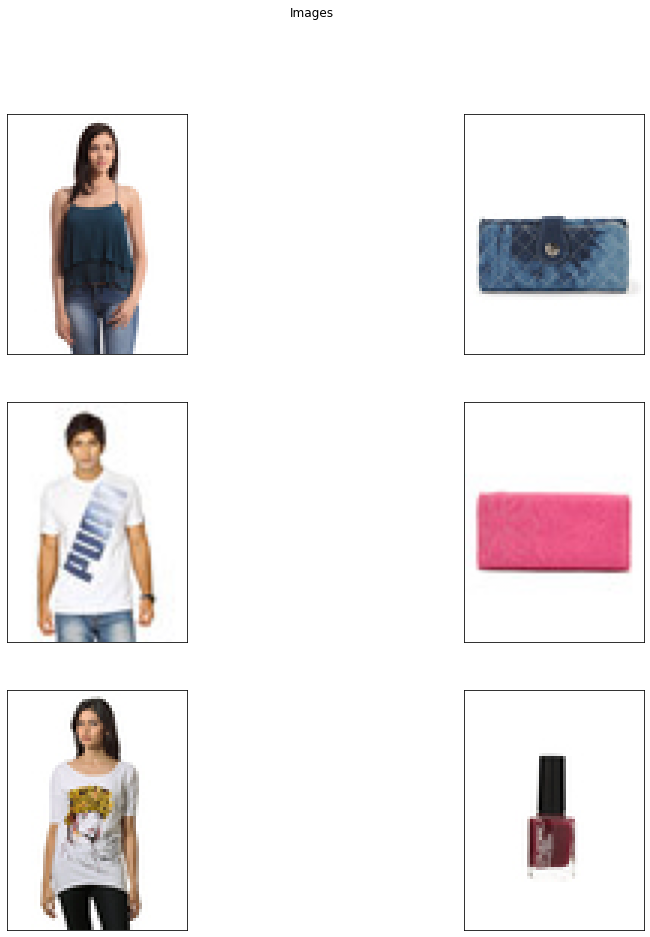

In [ ]:
# Display pictures

pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = df.sample(1).loc[:,'filename'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    print(img.shape)
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
generator = ImageDataGenerator(
    rescale = 1/255,
    validation_split=0.2,
)

In [ ]:
test_generator=ImageDataGenerator(
    rescale = 1/255
)

In [ ]:
train_gen = generator.flow_from_dataframe(train_df,x_col='filename',y_col='subCategory',
                                          target_size=(80,60),
                                          batch_size=32,
                                          subset='training')
val_gen = generator.flow_from_dataframe(train_df,x_col='filename',y_col='subCategory',
                                        target_size=(80,60),
                                        batch_size=32,
                                        subset='validation')

Found 32339 validated image filenames belonging to 13 classes.
Found 8084 validated image filenames belonging to 13 classes.


In [ ]:
test_gen = test_generator.flow_from_dataframe(test_df,x_col='filename',y_col='subCategory',
                                              target_size=(80,60),
                                              batch_size=32
                                             )

Found 3998 validated image filenames belonging to 13 classes.


### CNN Model

Below is my baseline structure for the Image Classification CNN.

The CNN model is made up of 6 layers; convolutional layers, max pooling layer, flatten layer, and 3 densely-connected NN layers. The pattern of the CNN is:

1.   Convolutional Layer
2.   Max Pooling Layer
3.   Batch Normalization
4.   Flatten layer
5.   Densely-connected NN layer with ReLU activation
6.   Batch Normalization
7.   Densely-connected NN layer with ReLU activation
8.   Densely-connected NN layer with Softmax activation

Batch normalization is done to make the training process faster by re-centering and re-scaling the input.

The convolutional layer uses rectified linear unit activation functions. ReLU was chosen as the activation funtion because studies show that a model that uses ReLU is easier to train and often achieves better performance. The model uses a 3x3 convolution filter, as that is the most common and popular choice.

The last layer in the model, which is a Densely-Connected NN layer, uses Softmax activation function because it outputs a probability distribution and the result of the last layer of a classification network could be interpreted as a probability distribution.

The 3 Dense layers slowly decrease the dimensionality of the output space to the expected 13 outputs.

The model uses the ADAM optimizer with learning rate set to 5e-4.

In [ ]:
## CNN model
def build_model():
  input_layer=Input(shape=(80,60,3))

  h0=Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="valid")(input_layer)
  h1=MaxPool2D(pool_size=(2,2),strides=(1,1))(h0)
  h2=BatchNormalization()(h1)

  h3=Flatten()(h2)

  h4=Dense(64,activation="relu")(h3)
  h5=BatchNormalization()(h4)

  h6=Dense(32,activation="relu")(h5)
  output_layer=Dense(13,activation="softmax")(h6)
  model2=Model(inputs=input_layer,outputs=output_layer)
  model2.summary()

  # Set Adam optimizer
  model2.compile(loss='categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
      metrics=['accuracy'])

  return model2

In [ ]:
model2 = build_model()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 80, 60, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 78, 58, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 77, 57, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_11 (Bat  (None, 77, 57, 16)       64        
 chNormalization)                                                
                                                                 
 flatten_5 (Flatten)         (None, 70224)             0         
                                                                 
 dense_15 (Dense)            (None, 64)                4494

In [ ]:
# train the model
epoch_num = 5

history2 = model2.fit(
    train_gen,
    epochs=epoch_num,
    validation_data=val_gen)

Epoch 1/5
1011/1011 [==============================] - 326s 323ms/step - loss: 0.1106 - accuracy: 0.9695 - val_loss: 0.2650 - val_accuracy: 0.9270
Epoch 2/5
1011/1011 [==============================] - 260s 257ms/step - loss: 0.0873 - accuracy: 0.9756 - val_loss: 0.2513 - val_accuracy: 0.9278
Epoch 3/5
1011/1011 [==============================] - 267s 264ms/step - loss: 0.0639 - accuracy: 0.9823 - val_loss: 0.2310 - val_accuracy: 0.9377
Epoch 4/5
1011/1011 [==============================] - 260s 257ms/step - loss: 0.0494 - accuracy: 0.9866 - val_loss: 0.2456 - val_accuracy: 0.9337
Epoch 5/5
1011/1011 [==============================] - 258s 255ms/step - loss: 0.0389 - accuracy: 0.9901 - val_loss: 0.3023 - val_accuracy: 0.9273


### Evaluate CNN on Validation Set and Test Set

In [ ]:
val_results = model2.evaluate(val_gen)

253/253 [==============================] - 19s 77ms/step - loss: 0.3023 - accuracy: 0.9273


In [ ]:
test_results = model2.evaluate(test_gen)

125/125 [==============================] - 10s 77ms/step - loss: 0.3111 - accuracy: 0.9240


### Conclusion on the Performance of the Baseline Approach

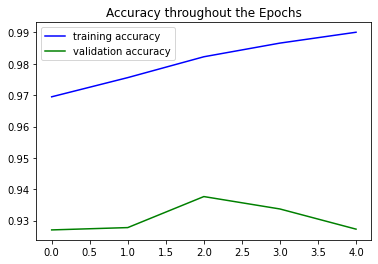

In [ ]:
# plot the accuracy of baseline approach
hist=history2.history
plt.title('Accuracy throughout the Epochs')
plt.plot(hist["accuracy"],color="b",label="training accuracy")
plt.plot(hist["val_accuracy"],color="g",label="validation accuracy")
plt.legend()
plt.show()

The line plot above shows the performance accuracy of the model on the train and the validation data sets throughout the epochs. For the first epoch, the training performance accuracy on the training dataset was ~97% and ~92% on the validation dataset. With the rest of the epochs, the accuracy of the model performance increased on the training set in an almost linear curve. The accuracy of the model performance increased on the validation set until the 3rd epoch, rising to ~94%, however it  started decreasing in accuracy towards ~92% afterwards.

When the model was trained with more epochs (10-15), both the training and validation dataset accuracies would stabalize near the end.

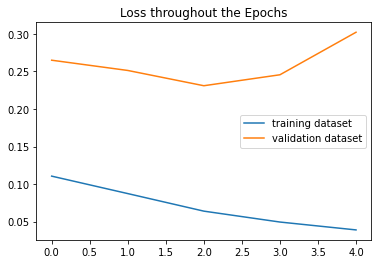

In [ ]:
# plot loss during training
plt.title('Loss throughout the Epochs')
plt.plot(hist['loss'], label='training dataset')
plt.plot(hist['val_loss'], label='validation dataset')
plt.legend()

The line plot above shows the loss value over training data throughout the epochs. The lower the value, the better. The loss value for the training data set decreased throughout the epochs from around 0.12 in a curve slight downwards, reaching values less than 0.05. The validation dataset decreased from around 0.27 to around 0.24 by the 3rd epoch, however afterwards it rapidly started increasing. Just like with the accuracy, the validation dataset experienced a worsening in performance after the 3rd epoch, while the training dataset continued to experience steady improvement in performance.

In [ ]:
print("Accuracy of model for validation dataset at final epoch: %.2f%%" %(val_results[1] * 100))
print("Accuracy of model for testing dataset at final epoch: %.2f%%" %(test_results[1] * 100))
print("Loss of model for validation dataset at final epoch: %.4f" %(val_results[0]))
print("Loss of model for testing dataset at final epoch: %.4f" %(test_results[0]))

Accuracy of model for validation dataset at final epoch: 92.73%
Accuracy of model for testing dataset at final epoch: 92.40%
Loss of model for validation dataset at final epoch: 30.23%
Loss of model for testing dataset at final epoch: 31.11%


Above, we see that the performance of the model on the validation dataset and the testing dataset are very similar. The accuracy differs by less than 0.5% (validation dataset having higher accuracy) and the loss differing by less than 0.1 (validation dataset having less loss).

At the moment, the values for both the accuracy and the loss of the model on the validation and testing datasets are worse than for the training dataset. This is particularly visible for loss, since the validation and testing datasets experienced over 0.25 more loss than the training dataset after the final epoch.

In combination with what we saw of worsening performance of the model on the validation dataset after the 3rd epoch, we can conclude that the model is overfitting, as it cannot generalize as well to unseed data.

## Part 2: Improved Image Classification

### Tuning One Hyper-Parameter

One thing that I explored for the baseline model while building it was the learning rate. Learning rates which were larger (eg. 1e-3) resulted in the model being built faster, however had significantly lower accuracy (\~80%) and significantly higher loses. On the other hand, learning rates which were smaller (eg. 1e-4) resulted in a model being build slower, however it had significantly higher accuracy (\~90%), yet would start overfitting. Just from the cursory exploration, it is evident that the learning rate hyperparameter has a large impact on the model performance (over 10%) hence it is worth tuning to get the optimal performance.

I will explore the learning rate hyperparameter. I will set the maximum value to 1e-3, since I've seen that it does not perform well and hence values higher than it would likely also not perform well. I will set the minimum value to 5e-5 since I want to explore a smaller learning rate than 1e-4 to see if it would be even better. I will judge the performance of the model after training for 3 epochs, hence prioritizing models that take less iterations to learn.

In [ ]:
num_epochs = 3
max_lr = 1e-3
min_lr = 5e-5

In [ ]:
# ! pip install keras_tuner
import keras_tuner

In [ ]:
#set learning rate
hp = keras_tuner.HyperParameters()

In [ ]:
## CNN model, takes in learning rate as a parameter
def build_tuned_model(hp):
  input_layer=Input(shape=(80,60,3))

  h0=Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="valid")(input_layer)
  h1=MaxPool2D(pool_size=(2,2),strides=(1,1))(h0)
  h2=BatchNormalization()(h1)

  h3=Flatten()(h2)

  h4=Dense(64,activation="relu")(h3)
  h5=BatchNormalization()(h4)

  h6=Dense(32,activation="relu")(h5)
  output_layer=Dense(13,activation="softmax")(h6)
  model2=Model(inputs=input_layer,outputs=output_layer)
  model2.summary()

  learning_rate = hp.Float("lr", min_value=min_lr, max_value=max_lr, sampling="log")
  # Set Adam optimizer
  model2.compile(loss='categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=['accuracy'])

  return model2

In [ ]:
#create the tuner
tuner = keras_tuner.RandomSearch(
    hypermodel=build_tuned_model,
    objective="val_accuracy",
    max_trials=4,
    executions_per_trial=1, # to save time
    overwrite=True,
    directory="search_results",
    project_name="learning_rate_optimize",
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80, 60, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 58, 16)        448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 77, 57, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 77, 57, 16)       64        
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 70224)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                4494

In [ ]:
#print a summary of the search space
tuner.search_space_summary()

Search space summary
Default search space size: 1
lr (Float)
{'default': 5e-05, 'conditions': [], 'min_value': 5e-05, 'max_value': 0.001, 'step': None, 'sampling': 'log'}


In [ ]:
tuner.search(train_gen, epochs=num_epochs, validation_data=val_gen)

Trial 4 Complete [00h 13m 02s]
val_accuracy: 0.9272637367248535

Best val_accuracy So Far: 0.9272637367248535
Total elapsed time: 00h 53m 19s


In [ ]:
# tuning results summary
tuner.results_summary()

Results summary
Results in search_results/learning_rate_optimize
Showing 10 best trials
Trial summary
Hyperparameters:
lr: 8.825905171241425e-05
Score: 0.9272637367248535
Trial summary
Hyperparameters:
lr: 0.00017701830785281708
Score: 0.9220682978630066
Trial summary
Hyperparameters:
lr: 0.00045619273733040855
Score: 0.898688793182373
Trial summary
Hyperparameters:
lr: 0.0007876426148675536
Score: 0.8976991772651672


We observe that the models are sequentially arranged based on their learning rate, with the smallest learning rate resulting in the highest score.

In [ ]:
# get the top hyperparameters
best_hps = tuner.get_best_hyperparameters(1)
# build the model with the best hp
tuned_model = build_tuned_model(best_hps[0])

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 80, 60, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 78, 58, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 77, 57, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_18 (Bat  (None, 77, 57, 16)       64        
 chNormalization)                                                
                                                                 
 flatten_9 (Flatten)         (None, 70224)             0         
                                                                 
 dense_27 (Dense)            (None, 64)                4494

In [ ]:
# repeat the model building with 3 epochs
epoch_num = 3

history3 = tuned_model.fit(
    train_gen,
    epochs=epoch_num,
    validation_data=val_gen)

Epoch 1/3
1011/1011 [==============================] - 258s 255ms/step - loss: 0.3578 - accuracy: 0.9067 - val_loss: 0.3314 - val_accuracy: 0.9086
Epoch 2/3
1011/1011 [==============================] - 256s 253ms/step - loss: 0.2260 - accuracy: 0.9358 - val_loss: 0.2571 - val_accuracy: 0.9257
Epoch 3/3
1011/1011 [==============================] - 262s 259ms/step - loss: 0.1558 - accuracy: 0.9555 - val_loss: 0.2543 - val_accuracy: 0.9254


### Data Augmentation

Generating more images for training

In [ ]:
# create image augmentation that will be used on the training set
augmented_generator = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=45,          # rotates image
    #width_shift_range=0.2,      # move all pixel of image horizontally
    #height_shift_range=0.2,     # move all pixel of image vertically
    #shear_range=0.2,            # shear image (trim sides)
    zoom_range=0.2,             # zoom in and zoom out by 20%
    horizontal_flip=True,       # horizontal reflection
    #fill_mode='constant',       # fills the leftover area from image shift with cval colour
    #cval=125,                   # specifies color to use in fill_mode
    validation_split=0.2,       # training-validation split 80:20
)

In [ ]:
# apply the augmented image generator on the training and validation datasets
aug_train_gen = augmented_generator.flow_from_dataframe(train_df,x_col='filename',y_col='subCategory',
                                          target_size=(80,60),
                                          batch_size=32,
                                          subset='training')
aug_val_gen = augmented_generator.flow_from_dataframe(train_df,x_col='filename',y_col='subCategory',
                                        target_size=(80,60),
                                        batch_size=32,
                                        subset='validation')

Found 32339 validated image filenames belonging to 13 classes.
Found 8084 validated image filenames belonging to 13 classes.


In [ ]:
# build the model
aug_model = build_model()

In [ ]:
# repeat the model building with the same amount of epochs as the baseline
history4 = aug_model.fit(
    aug_train_gen,
    epochs=epoch_num,
    validation_data=aug_val_gen)

Epoch 1/5
1011/1011 [==============================] - 331s 328ms/step - loss: 1.0043 - accuracy: 0.7074 - val_loss: 0.8475 - val_accuracy: 0.7468
Epoch 2/5
1011/1011 [==============================] - 317s 314ms/step - loss: 0.8141 - accuracy: 0.7546 - val_loss: 0.7484 - val_accuracy: 0.7682
Epoch 3/5
1011/1011 [==============================] - 332s 328ms/step - loss: 0.7343 - accuracy: 0.7730 - val_loss: 0.6989 - val_accuracy: 0.7859
Epoch 4/5
1011/1011 [==============================] - 326s 323ms/step - loss: 0.6843 - accuracy: 0.7872 - val_loss: 0.6621 - val_accuracy: 0.7923
Epoch 5/5
1011/1011 [==============================] - 326s 322ms/step - loss: 0.6525 - accuracy: 0.7944 - val_loss: 0.6239 - val_accuracy: 0.7996


### Conclusion on the Performance of Improved Models

In [ ]:
val_results_tuned = tuned_model.evaluate(val_gen)
test_results_tuned = tuned_model.evaluate(test_gen)
val_results_aug = aug_model.evaluate(aug_val_gen)
test_results_aug = aug_model.evaluate(test_gen)

125/125 [==============================] - 11s 84ms/step - loss: 0.5149 - accuracy: 0.8389


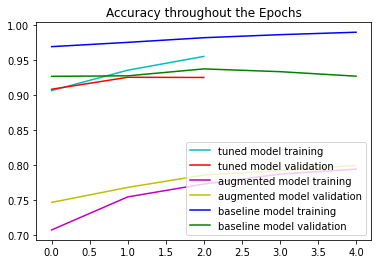

In [ ]:
# plot accuracies of all 3 models
hist3=history3.history
hist4=history4.history
plt.title('Accuracy throughout the Epochs')
plt.plot(hist3["accuracy"],color="c",label="tuned model training")
plt.plot(hist3["val_accuracy"],color="r",label="tuned model validation")
plt.plot(hist4["accuracy"],color="m",label="augmented model training")
plt.plot(hist4["val_accuracy"],color="y",label="augmented model validation")
plt.plot(hist["accuracy"],color="b",label="baseline model training")
plt.plot(hist["val_accuracy"],color="g",label="baseline model validation")
plt.legend(loc='lower right')
plt.show()

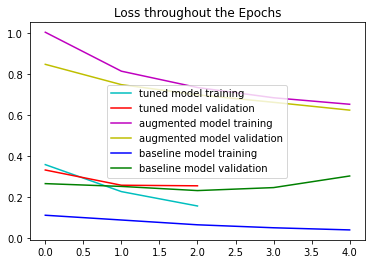

In [ ]:
# plot losses of all 3 models
plt.title('Loss throughout the Epochs')
plt.plot(hist3["loss"],color="c",label="tuned model training")
plt.plot(hist3["val_loss"],color="r",label="tuned model validation")
plt.plot(hist4["loss"],color="m",label="augmented model training")
plt.plot(hist4['val_loss'],color="y",label="augmented model validation")
plt.plot(hist["loss"],color="b",label="baseline model training")
plt.plot(hist['val_loss'],color="g",label="baseline model validation")
plt.legend()
plt.show()

In [ ]:
print("Accuracies of models on validation dataset:")
print("Baseline Model: %.2f%%" %(val_results[1] * 100))
print("Learning Rate Tuned Model: %.2f%%" %(val_results_tuned[1] * 100))
print("Augmented Dataset Model: %.2f%%" %(val_results_aug[1] * 100))

Accuracies of models on validation dataset:
Baseline Model: 92.73%
Learning Rate Tuned Model: 92.54%
Augmented Dataset Model: 80.49%


In [ ]:
print("Accuracies of models on test dataset:")
print("Baseline Model: %.2f%%" %(test_results[1] * 100))
print("Learning Rate Tuned Model: %.2f%%" %(test_results_tuned[1] * 100))
print("Augmented Dataset Model: %.2f%%" %(test_results_aug[1] * 100))

Accuracies of models on test dataset:
Baseline Model: 92.40%
Learning Rate Tuned Model: 92.17%
Augmented Dataset Model: 83.89%


In [ ]:
print("Losses of models on validation dataset: ")
print("Baseline Model: %.4f" %(val_results[0]))
print("Learning Rate Tuned Model: %.4f" %(val_results_tuned[0]))
print("Augmented Dataset Model: %.4f" %(val_results_aug[0]))

Losses of models on validation dataset: 
Baseline Model: 0.3023
Learning Rate Tuned Model: 0.2543
Augmented Dataset Model: 0.6257


In [ ]:
print("Losses of models on test dataset: ")
print("Baseline Model: %.4f" %(test_results[0]))
print("Learning Rate Tuned Model: %.4f" %(test_results_tuned[0]))
print("Augmented Dataset Model: %.4f" %(test_results_aug[0]))

Losses of models on test dataset: 
Baseline Model: 0.3111
Learning Rate Tuned Model: 0.2627
Augmented Dataset Model: 0.5149


Based on the results printed above, we conclude that the tuned model has highest accuracy on the test dataset even with the least amount of epochs, followed by baseline model, and then the augmented model. The tuned model has the lowest loss, followed by the baseline model, and the augmented model last.

With more epochs, the tuned model would have definitely done better than the baseline.

It is interesting to note that the baseline model does very well on its own without improvement, having the highest training dataset accuracy, and lowest training dataset loss. However, the tuned model has the lowest loss for both the validation and the testing datasets.

This shows that tuning hyperparameters is a very important task and can have a big impact on the performance of the model. The tuned model had the best performance of the 2 improved image classifiers.

Tuning the learning rate showed that a smaller learning rate resulted in better performance. The baseline approach had a learning rate of 5e-4, and the tuned model had a learning rate of 8.8e-5. When running the tuning trials, we observed that the models were sequentially arranged based on their learning rate, with the highest learning rate resulting in the lowest score.

The data augmentation model was a lot slower to train, and after 5 epochs it was still steadily increasing in accuracy and decreasing in loss. Hence I do not think the model was weaker at classification than the other models, but rather needed quite a lot more time to train. Since the baseline model was overfitting quite a lot, it is likely that with more training, the image augmentation model would help with the overfitting, as data augmentation is a common way to reduce overfitting in CNN models.